# Wikidata - the Sherlock Holmes investigative AI

In [ ]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Part 1: Data Processing

### Import dataset from WikiData in csv format

In [45]:
data = pd.read_csv('query.csv')
print(data.head(5))

                            human gender     cause         date_of_birth  \
0                  Hermann Göring   male   suicide  1893-01-12T00:00:00Z   
1  Manfred Freiherr von Killinger   male   suicide  1886-07-14T00:00:00Z   
2  Manfred Freiherr von Killinger   male   suicide  1886-07-14T00:00:00Z   
3                     Tewodros II   male   suicide  1818-01-01T00:00:00Z   
4              William the Silent   male  homicide  1533-05-04T00:00:00Z   

          date_of_death                     country          occupation  \
0  1946-10-15T00:00:00Z                Nazi Germany      aircraft pilot   
1  1944-09-02T00:00:00Z                     Germany          politician   
2  1944-09-02T00:00:00Z                     Germany              writer   
3  1868-04-13T00:00:00Z                    Ethiopia          politician   
4  1584-07-10T00:00:00Z  Kingdom of the Netherlands  military personnel   

                             religion  
0                         Lutheranism  
1           

### De-duplicate according to person's name

In [46]:
print("Before de-du, # of data is: {}".format(data.shape[0]))
data = data.drop_duplicates(subset='human')
print("After de-du, # data is: {}".format(data.shape[0]))

Before de-du, # of data is: 13455
After de-du, # data is: 3818


### Feature & Label Selection
We selected these four factors: 'gender', 'country', 'occupation', and 'religion' as possible features.
The label is 'cause' (casue of death).

In [47]:
data_raw = data.drop('human', axis=1)
features_raw = data_raw.drop(['cause', 'date_of_birth', 'date_of_death'], axis=1)
label_raw = data['cause'] 
print(features_raw.head(5))

  gender                     country          occupation  \
0   male                Nazi Germany      aircraft pilot   
1   male                     Germany          politician   
3   male                    Ethiopia          politician   
4   male  Kingdom of the Netherlands  military personnel   
5   male    Kingdom of Great Britain         philosopher   

                             religion  
0                         Lutheranism  
1                         Lutheranism  
3  Ethiopian Orthodox Tewahedo Church  
4                           Calvinism  
5                   Church of England  


In [49]:
print("# of label: {}".format(label_raw.shape))
print("# of features: {}".format(features_raw.shape))

# label: (3818,)
# features: (3818, 4)


The statistical information about the label of our data.

In [51]:
x = label_raw.value_counts()
df = pd.DataFrame(x)
print(df)

                cause
natural causes   2707
homicide          693
accident          219
suicide           199


### Convert categorical variable into indicator variables (Encoding label and features)

In [53]:
features = pd.get_dummies(features_raw, columns=['gender', 'country', 'occupation', 'religion'])
label = pd.get_dummies(label_raw)
print("# of data: {}".format(features.shape[0]))
print("# of encoded labels is {}\n# of encoded features is {}".format(label.shape[1], features.shape[1]))

# of data: 3818
# of encoded labels is 4
# of encoded features is 777


### Split the data into training data and testing data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=.2, random_state=5)
print("Training set has {} samples.\nTesting set has {} samples."
      .format((X_train.shape[0]), X_test.shape[0]))

Training set has 3054 samples.
Testing set has 764 samples.


## Part 2: Models Evaluation

In this part, we attempted 7 different models without fine-tuning, namely, they are:
* Naive Bayes
* Support Vector Machine
* Decision Tree
* Random Forest
* AdaBoost
* K-nearest Neighbors
* Multi-layer Perceptron

We use two metrics to evaluate the performance of each model:
* Accuracy Score
* F1-Score

In [10]:
# Naive Bayes
y_pred_NB = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train).predict(X_test)
print('The accuracy for Naive Bayes is {}.\nThe f1_score for Naive Bayes is {}.'\
    .format(accuracy_score(y_test, y_pred_NB),f1_score(y_test, y_pred_NB, average='micro')))

The accuracy for Naive Bayes is 0.159685863874.
The f1_score for Naive Bayes is 0.214765100671.


In [147]:
# SVM
y_pred_svm = OneVsRestClassifier(SVC(kernel='linear', random_state=5)).fit(X_train, y_train).predict(X_test)
print('The accuracy for SVM is {}.\nThe f1_score for SVM is {}.'\
    .format(accuracy_score(y_test, y_pred_svm),f1_score(y_test, y_pred_svm, average='micro')))

The accuracy for SVM is 0.674083769634.
The f1_score for SVM is 0.700610997963.


In [55]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("The accuracy for Decision Tree is {}.\nThe f1_score for Decision Tree is {}."
      .format(accuracy_score(y_test, y_pred_tree), f1_score(y_test, y_pred_tree, average='micro')))

The accuracy for Decision Tree is 0.630890052356.
The f1_score for Decision Tree is 0.656675749319.


In [12]:
# Random Forest
random = RandomForestClassifier(random_state=5)
random.fit(X_train, y_train)
y_pred_random = random.predict(X_test)
print('The accuracy for Random Forest is {}.\nThe f1_score for Random Forest is {}.'
      .format(accuracy_score(y_test, y_pred_random),f1_score(y_test, y_pred_random, average='micro')))

The accuracy for Random Forest is 0.659685863874.
The f1_score for Random Forest is 0.689466484268.


In [13]:
# AdaBoost
y_pred_boost = OneVsRestClassifier(AdaBoostClassifier(random_state=5)).fit(X_train, y_train).predict(X_test)
print('The accuracy for AdaBoost is {}.\nThe f1_score for AdaBoost is {}.'
      .format(accuracy_score(y_test, y_pred_boost),f1_score(y_test, y_pred_boost, average='micro')))

The accuracy for AdaBoost is 0.689790575916.
The f1_score for AdaBoost is 0.722296395194.


In [14]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('The accuracy for KNN is {}.\nThe f1_score for KNN is {}.'
      .format(accuracy_score(y_test, y_pred_knn),f1_score(y_test, y_pred_knn, average='micro')))

The accuracy for KNN is 0.675392670157.
The f1_score for KNN is 0.704436860068.


In [61]:
# MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=1)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print('The accuracy for MLP is {}.\nThe f1_score for MLP is {}.'
      .format(accuracy_score(y_test, y_pred_mlp),f1_score(y_test, y_pred_mlp, average='micro')))

The accuracy for MLP is 0.688481675393.
The f1_score for MLP is 0.724019270475.


## Part 3: Fine-tuning the Models

In this section, we focused on searching optimal parameters of the models that we trained in the last part.

In [78]:
# Fine-Tuning: KNN
n_neighbors = range(1,10)
params = dict(n_neighbors=n_neighbors)
knn_optimal = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_optimal, params, scoring='accuracy', cv=10)
t0 = time()
grid_knn.fit(X_train, y_train)
t1 = time()
print("Training time: {}".format(t1-t0))
best_clf = grid_knn.best_estimator_
results = grid_knn.grid_scores_
print("The best optimized KNN found: \n\n{}".format(best_clf))
print("\nThe highest accuracy score is {}".format(grid_knn.best_score_))

Training time: 1102.16591382
The best optimized KNN found: 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

The highest accuracy score is 0.67583497053


/Users/wangying/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


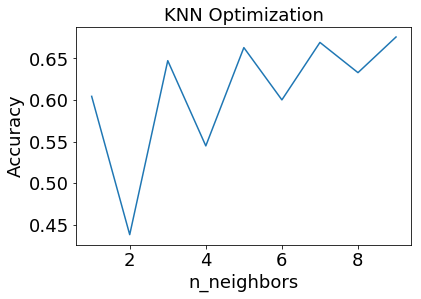

In [79]:
grid_mean_scores = []
for r in results:
    grid_mean_scores.append(r.mean_validation_score)
plt.title('KNN Optimization', fontsize=18)
plt.plot(n_neighbors, grid_mean_scores)
plt.tick_params(labelsize=18)
plt.xlabel('n_neighbors', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

In [80]:
y_pred_knn_optimal = best_clf.predict(X_test)
print('The accuracy for optimized KNN is {}.\nThe f1_score for optimized KNN is {}.'
      .format(accuracy_score(y_test, y_pred_knn_optimal), f1_score(y_test, y_pred_knn_optimal, average='micro')))

The accuracy for optimized KNN is 0.687172774869.
The f1_score for optimized KNN is 0.717213114754.


In [114]:
# Fine-Tuning: Decision Tree
max_depth = range(1,20)
min_samples_split = range(2,20)
params = dict(max_depth=max_depth, min_samples_split=min_samples_split)
tree_optimal = DecisionTreeClassifier(random_state=5)
grid_tree = GridSearchCV(tree_optimal, params, scoring='accuracy', cv=10)
t0 = time()
grid_tree.fit(X_train, y_train)
t1 = time()
print "Training time is: {}".format(t1-t0)
best_clf = grid_tree.best_estimator_
results = grid_tree.grid_scores_
print "The best optimized Decision Tree found: \n\n{}".format(best_clf)
print "\nThe highest accuracy score is: {}".format(grid_tree.best_score_)

The traning time is: 310.727873087
The best optimized Decision Tree is: 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=5, splitter='best')

The best accuracy score is: 0.72527832351


/Users/wangying/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


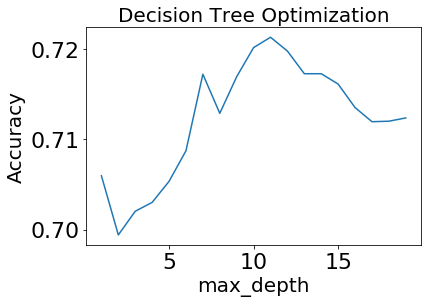

In [113]:
grid_mean_scores = []
for i in results:
    grid_mean_scores.append(i.mean_validation_score)
count = 1
list1 = []
list2 = []
for i in grid_mean_scores:
    list1.append(i)
    count += 1
    if count == 19:
        list2.append(np.mean(list1))
        list1 = []
        count = 1
plt.title('Decision Tree Optimization', fontsize=18)
plt.plot(max_depth, list2)
plt.tick_params(labelsize=20)
plt.xlabel('max_depth', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

In [115]:
y_pred_tree_optimal = best_clf.predict(X_test)
print('The accuracy for optimized Decision Tree is: {}.\nThe f1_score for optimized Decision Tree is: {}.'\
    .format(accuracy_score(y_test, y_pred_tree_optimal),f1_score(y_test, y_pred_tree_optimal, average='micro')))

The accuracy for optimized Decision Tree is: 0.730366492147.
The f1_score for optimized Decision Tree is: 0.731323722149.


In [116]:
# Model Optimization: Random Forest
max_depth = range(1,20)
min_samples_split = range(2,20)
params = dict(max_depth=max_depth, min_samples_split=min_samples_split)
random_optimal = RandomForestClassifier(random_state=5)
grid_random = GridSearchCV(random_optimal, params, scoring='accuracy', cv=10)
t0 = time()
grid_random.fit(X_train, y_train)
t1 = time()
print("Training time: {}".format(t1-t0))
best_clf = grid_random.best_estimator_
results = grid_random.grid_scores_
print("The best optimized Random Forest found: \n\n{}".format(best_clf))
print("\nThe highest accuracy score is: {}".format(grid_random.best_score_))

Training time: 464.998425961
The best optimized Random Forest found: 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=5,
            verbose=0, warm_start=False)

The highest accuracy score is: 0.712835625409


/Users/wangying/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


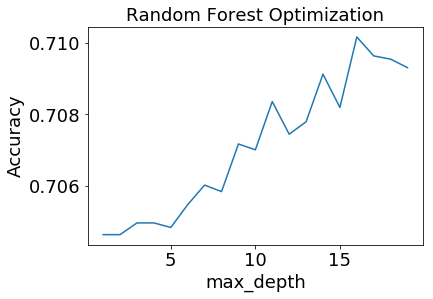

In [117]:
list1 = []
list2 = []
count = 1
for i in results:
    list1.append(i[1])
    count += 1
    if count == 19:
        list2.append(np.mean(list1))
        list1 = []
        count = 1
plt.plot(max_depth, list2)
plt.tick_params(labelsize=18)
plt.title("Random Forest Optimization", fontsize=18)
plt.xlabel("max_depth", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.show()

In [118]:
y_pred_random_optimal = best_clf.predict(X_test)
print('The accuracy for optimized Random Forest is: {}.\nThe f1_score for optimized Random Forest is: {}.'
.format(accuracy_score(y_test, y_pred_random_optimal),f1_score(y_test, y_pred_random_optimal, average='micro')))

The accuracy for optimized Random Forest is: 0.719895287958.
The f1_score for optimized Random Forest is: 0.727513227513.


In [129]:
#  Model Optimization: MLP
hidden_layer_sizes = range(1,11)
learning_rate = ['constant', 'adaptive']
params = dict(hidden_layer_sizes=hidden_layer_sizes, learning_rate=learning_rate)
mlp_optimal = MLPClassifier(hidden_layer_sizes=10)
grid_mlp = GridSearchCV(mlp_optimal, params, scoring='accuracy', cv=10)
t0 = time()
grid_mlp.fit(X_train, y_train)
t1 = time()
print("Training time is: {}".format(t1-t0))
best_clf = grid_mlp.best_estimator_
results = grid_mlp.grid_scores_
print("The best optimized Decision Tree found: \n\n{}".format(best_clf))
print("\nThe highest accuracy score is: {}".format(grid_mlp.best_score_))

Training time is: 1357.57113481
The best optimized Decision Tree found: 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

The highest accuracy score is: 0.684348395547


/Users/wangying/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


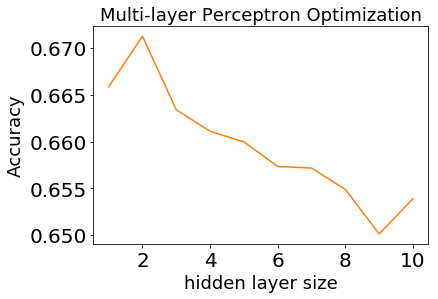

In [145]:
grid_mean_scores = []
for i in results:
    grid_mean_scores.append(i.mean_validation_score)
list1 = []
list2 = []
for i in range(0, 10):
    list1.append(grid_mean_scores[i])
    list1.append(grid_mean_scores[i + 10])
    list2.append(np.mean(list1))
    list1 = []
plt.title('Multi-layer Perceptron Optimization', fontsize=18)
plt.plot(hidden_layer_sizes, list2)
plt.tick_params(labelsize=20)
plt.xlabel('hidden_layer_size', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

In [146]:
y_pred_mlp_optimal = best_clf.predict(X_test)
print('The accuracy for optimized MLP is: {}.\nThe f1_score for optimized MLP is: {}.'\
    .format(accuracy_score(y_test, y_pred_mlp_optimal),f1_score(y_test, y_pred_mlp_optimal, average='micro')))

The accuracy for optimized MLP is: 0.726439790576.
The f1_score for optimized MLP is: 0.726439790576.


## Part 3: Conclusion

As a conclusion, in this experiment, we selected four potential factors as features, to make classification among four possible causes for the person's death. We tested on seven different models with inital setting of parameters and fine-tuned on four of them to find the optimal setting of parameters. Finally, we found that the Decision Tree model with 'max_depth=10' and 'min_sample_split=2' achieves best performance of accuracy and F1-score.